# 03. Сбор и обработка различных типов данных

## 1. Изображения

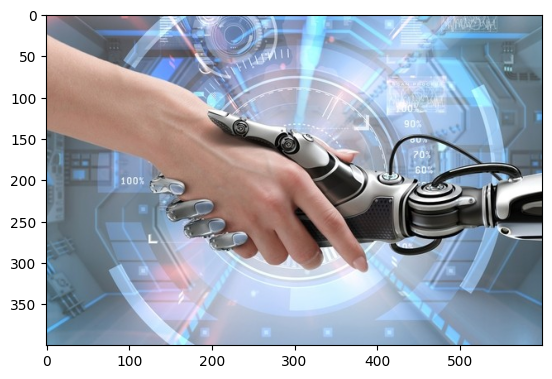

(400, 600, 3)
[[[218 149 167]
  [215 146 164]
  [211 144 161]
  ...
  [117 146 162]
  [116 145 161]
  [116 145 161]]

 [[215 148 165]
  [212 145 162]
  [207 143 159]
  ...
  [116 145 161]
  [116 145 161]
  [116 145 161]]

 [[209 147 162]
  [206 144 159]
  [202 141 156]
  ...
  [114 143 159]
  [114 143 159]
  [114 143 159]]

 ...

 [[104 146 171]
  [103 147 172]
  [105 149 174]
  ...
  [115 146 174]
  [115 146 174]
  [115 146 174]]

 [[106 145 174]
  [107 146 175]
  [109 148 177]
  ...
  [115 146 174]
  [116 147 175]
  [116 147 175]]

 [[108 145 174]
  [109 146 175]
  [109 148 177]
  ...
  [116 147 175]
  [116 147 175]
  [117 148 176]]]


In [ ]:
import matplotlib.pyplot as plt
#from matplotlib.image import imread
from skimage.io import imread

url = 'https://www.osp.ru/FileStorage/DOCUMENTS_ILLUSTRATIONS/13234504/original.jpg'
orig_img = imread(url)


plt.imshow(orig_img)
plt.show()

print(orig_img.shape)
print(orig_img)

### Фотографирование с помощью камеры в Google Colab

In [ ]:
# I have no idea who is the author of the code
# in this cell that saves an image from a webcam
# inside google colab.
# It comes from a notebook called "📸 Take a photo with your webcam"

from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)

var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='photo.jpg', quality=0.8, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))
#   with open(filename, 'wb') as f:
#     f.write(binary)
#   return len(binary)

In [ ]:
img = take_photo() # click

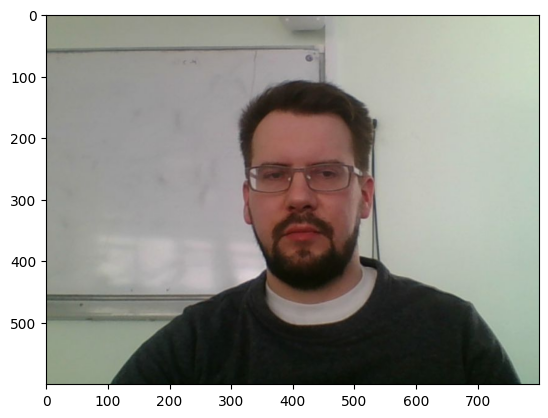

(600, 800, 3)
[[[145 148 129]
  [146 149 130]
  [147 150 131]
  ...
  [207 215 194]
  [207 215 194]
  [207 215 194]]

 [[145 148 129]
  [146 149 130]
  [147 150 131]
  ...
  [207 215 194]
  [207 215 194]
  [207 215 194]]

 [[145 148 129]
  [146 149 130]
  [147 150 131]
  ...
  [207 215 194]
  [207 215 194]
  [207 215 194]]

 ...

 [[144 158 132]
  [144 158 132]
  [144 158 132]
  ...
  [146 173 154]
  [146 173 154]
  [146 173 154]]

 [[145 158 132]
  [145 158 132]
  [144 158 132]
  ...
  [146 173 154]
  [146 173 154]
  [146 173 154]]

 [[145 158 132]
  [145 158 132]
  [144 158 132]
  ...
  [145 172 153]
  [145 172 153]
  [145 172 153]]]


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

print(img.shape)
print(img)

## 2. Видео

### Работа с видео на своем компьютере

In [ ]:
# !pip install opencv-python

In [ ]:
'''
import cv2
from datetime import datetime

capture = cv2.VideoCapture(0 + cv2.CAP_DSHOW)

while True:
    rtrn, image = capture.read()
    if image is None:
        from skimage import io
        image = io.imread('https://www.osp.ru/FileStorage/DOCUMENTS_ILLUSTRATIONS/13234504/original.jpg');
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    now = datetime.now()
    date_time = now.strftime("%d/%m/%Y, %H:%M:%S")
    cv2.putText(image, date_time, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1., (0,255,255), 2)
    cv2.imshow("OpenCV", image)

    if cv2.waitKey(1) == 27:
        break

capture.release()
cv2.destroyAllWindows()
'''

### Загрузка видео из файла, изменение, сохранение


In [ ]:
!wget http://thinkingform.com/wp-content/uploads/2017/09/video-sample-mp4.mp4

--2024-11-25 13:06:07--  http://thinkingform.com/wp-content/uploads/2017/09/video-sample-mp4.mp4
Resolving thinkingform.com (thinkingform.com)... 143.95.224.16
Connecting to thinkingform.com (thinkingform.com)|143.95.224.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383631 (375K) [video/mp4]
Saving to: ‘video-sample-mp4.mp4’

video-sample-mp4.mp 100%[===================>] 374.64K  1.48MB/s    in 0.2s    

2024-11-25 13:06:08 (1.48 MB/s) - ‘video-sample-mp4.mp4’ saved [383631/383631]



In [ ]:
import cv2
from datetime import datetime
date_time = datetime.now()

capture = cv2.VideoCapture('video-sample-mp4.mp4')
width  = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))   # float `width`
height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
codec = cv2.VideoWriter_fourcc(*'MP4V')
output = cv2.VideoWriter('output.mp4', codec, 30.0, (width,  height))

while True:
    rtrn, image = capture.read()
    if not rtrn:
        break

    now = datetime.now()
    date_time = now.strftime("%d/%m/%Y, %H:%M:%S")
    cv2.putText(image, date_time, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1., (0,255,255), 2)
    output.write(image)

capture.release()
output.release()

### Просмотр видео в Google Colab

In [ ]:
!pip install imageio-ffmpeg >> None

In [ ]:
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

def display_video(video):
    fig = plt.figure(figsize=(16,8))  #Display size specification

    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)

    plt.close()
    return anime

In [ ]:
video = imageio.mimread('output.mp4')  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

## 3. Аудио данные


### Работа с аудио на своем компьютере

In [ ]:
# !pip install pyAudio

In [ ]:
'''
# https://habr.com/ru/post/577806/

import pyaudio
import wave

CHUNK = 1024 # определяет форму ауди сигнала
FRT = pyaudio.paInt16 # шестнадцатибитный формат задает значение амплитуды
CHAN = 1 # канал записи звука
RT = 44100 # частота
REC_SEC = 5 #длина записи
OUTPUT = "output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FRT,channels=CHAN,rate=RT,input=True,frames_per_buffer=CHUNK) # открываем поток для записи
print("rec")
frames = [] # формируем выборку данных фреймов
for i in range(0, int(RT / CHUNK * REC_SEC)):
    data = stream.read(CHUNK)
    frames.append(data)
print("done")

stream.stop_stream() # останавливаем и закрываем поток
stream.close()
p.terminate()

w = wave.open(OUTPUT, 'wb')
w.setnchannels(CHAN)
w.setsampwidth(p.get_sample_size(FRT))
w.setframerate(RT)
w.writeframes(b''.join(frames))
w.close()
'''

### Запись аудио с компьютера в Google Colab

In [ ]:
!pip install ffmpeg-python >> None

In [ ]:
"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
from scipy.io.wavfile import write as wav_write
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))
  OUTPUT = "output.wav"
  wav_write(OUTPUT, sr, audio)

  return audio, sr

In [ ]:
audio, sr = get_audio()

### Распознавание речи

In [ ]:
!pip install SpeechRecognition >> None

In [ ]:
OUTPUT = "output.wav"
import speech_recognition as speech_r
r = speech_r.Recognizer()
harvard = speech_r.AudioFile(OUTPUT)
with harvard as source:
    audio = r.record(source)

print(r.recognize_google(audio, language="ru-RU"))

### ESC-50: Dataset for Environmental Sound Classification

https://dagshub.com/kinkusuma/esc50-dataset

In [ ]:
import numpy as np
import librosa
import soundfile as sf
import io
from six.moves.urllib.request import urlopen

audio_data = 'https://dagshub.com/kinkusuma/esc50-dataset/raw/3b812aa828f357df417069600a096c31816c5ef3/dataset/1-17970-A-4.wav'
data, sample_rate = sf.read(io.BytesIO(urlopen(audio_data).read()))
#data, sample_rate = librosa.load(audio_data, sr=None)

#### Воспроизведение звукового файла

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_data)

#### Построение графика амплитуды звуковой волны

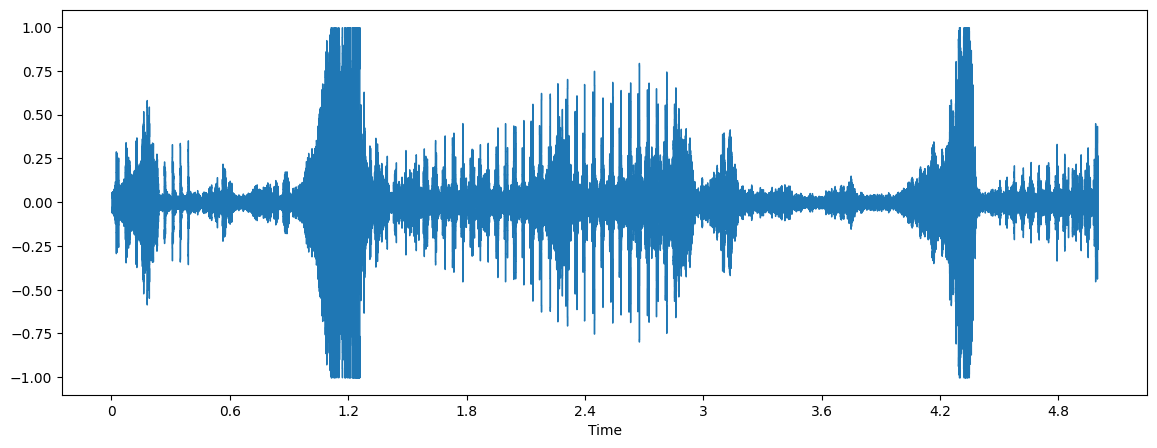

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [ ]:
left = 0
right = 220000

print(data.shape)
print(data[left:right].max() - data[left:right].min())

(220500,)
1.999969482421875


#### Построение спектрограммы

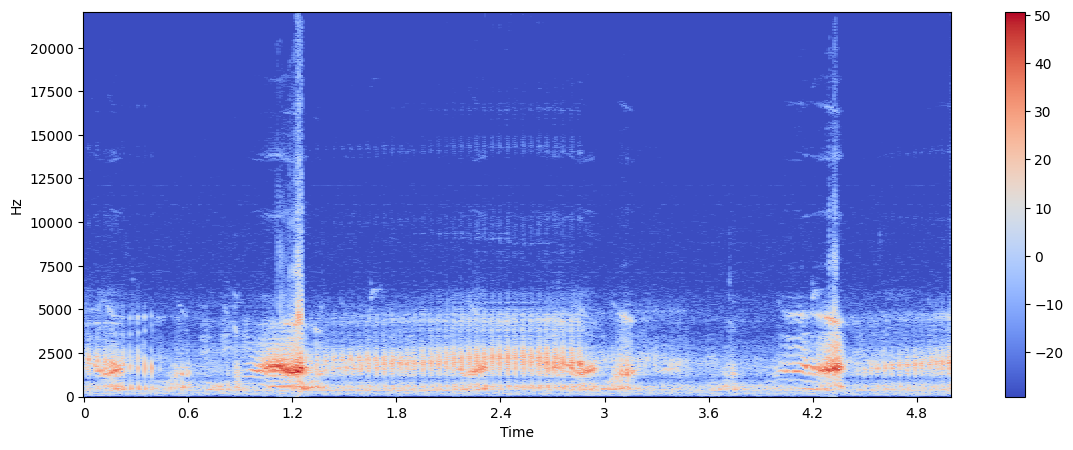

In [ ]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

#### Изучение определенного участка звукового файла

In [ ]:
three_seconds = sample_rate * 3
data_ = data[:three_seconds]

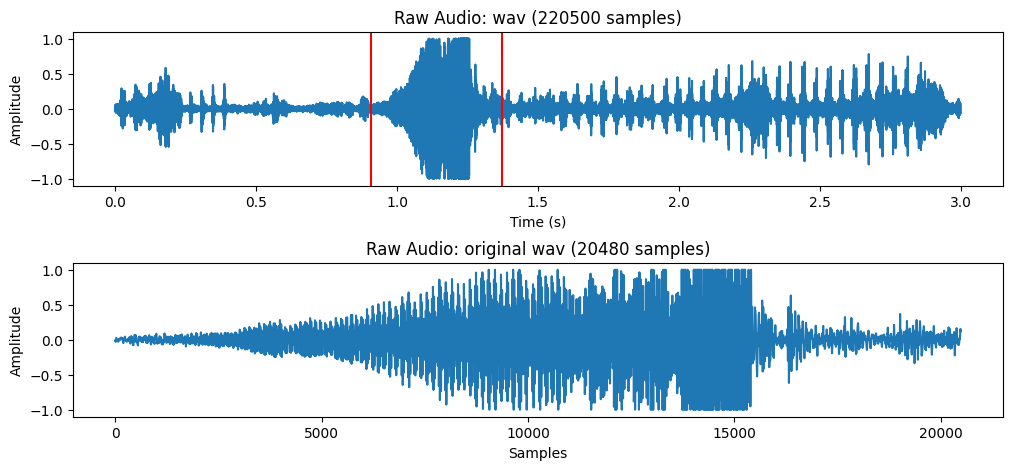

In [ ]:
timesteps = np.arange(len(data_)) / sample_rate  # in seconds

fig, ax = plt.subplots(2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

# plot the entire clip
ax[0].plot(timesteps, data_)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Raw Audio: {} ({} samples)'.format('wav', len(data)))


n_fft = 1024*20 # frame length
start = 40000 # start at a part of the sound thats not silence..
x = data_[start:start+n_fft]

# mark location of frame in the entire signal
ax[0].axvline(start/sample_rate, c='r')
ax[0].axvline((start+n_fft)/sample_rate, c='r')

# plot N samples
ax[1].plot(x)
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Raw Audio: {} ({} samples)'.format('original wav', len(x)));

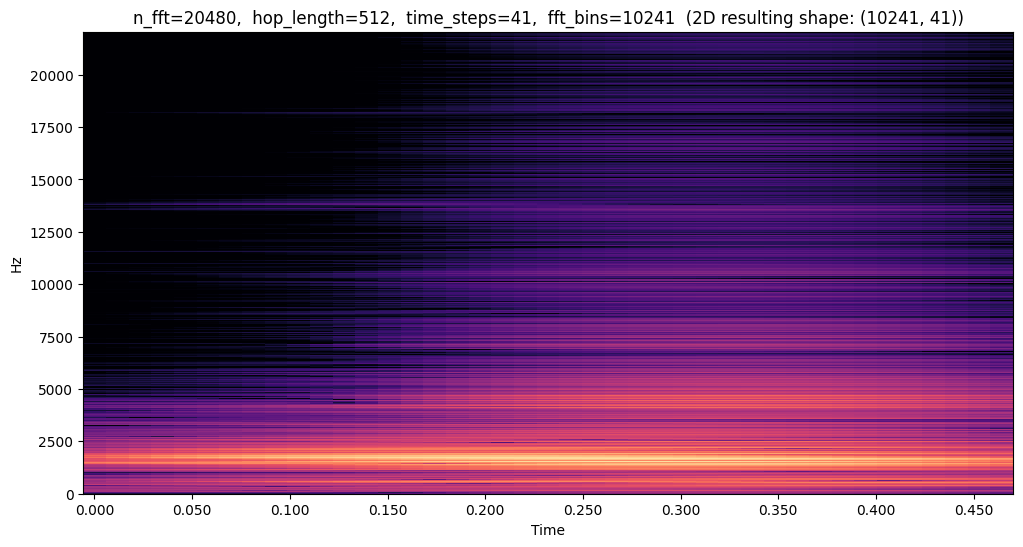

In [ ]:
hop_length = 512
stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_magnitude_db, x_axis='time', y_axis='linear',
                         sr=sample_rate, hop_length=hop_length)

title = 'n_fft={},  hop_length={},  time_steps={},  fft_bins={}  (2D resulting shape: {})'
plt.title(title.format(n_fft, hop_length,
                       stft_magnitude_db.shape[1],
                       stft_magnitude_db.shape[0],
                       stft_magnitude_db.shape));

## 4. Таблицы и временные ряды

### Работа с таблицами в библиотеке Pandas


In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv'
df = pd.read_csv(url, on_bad_lines='skip', delimiter=',')
df.head()

survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch            ticket     fare cabin embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

### Визуализация данных временного ряда

[[0.000e+00 5.800e+01]
 [1.000e+00 6.300e+01]
 [2.000e+00 7.000e+01]
 ...
 [3.074e+03 1.800e+01]
 [3.075e+03 3.100e+01]
 [3.076e+03 2.900e+01]]


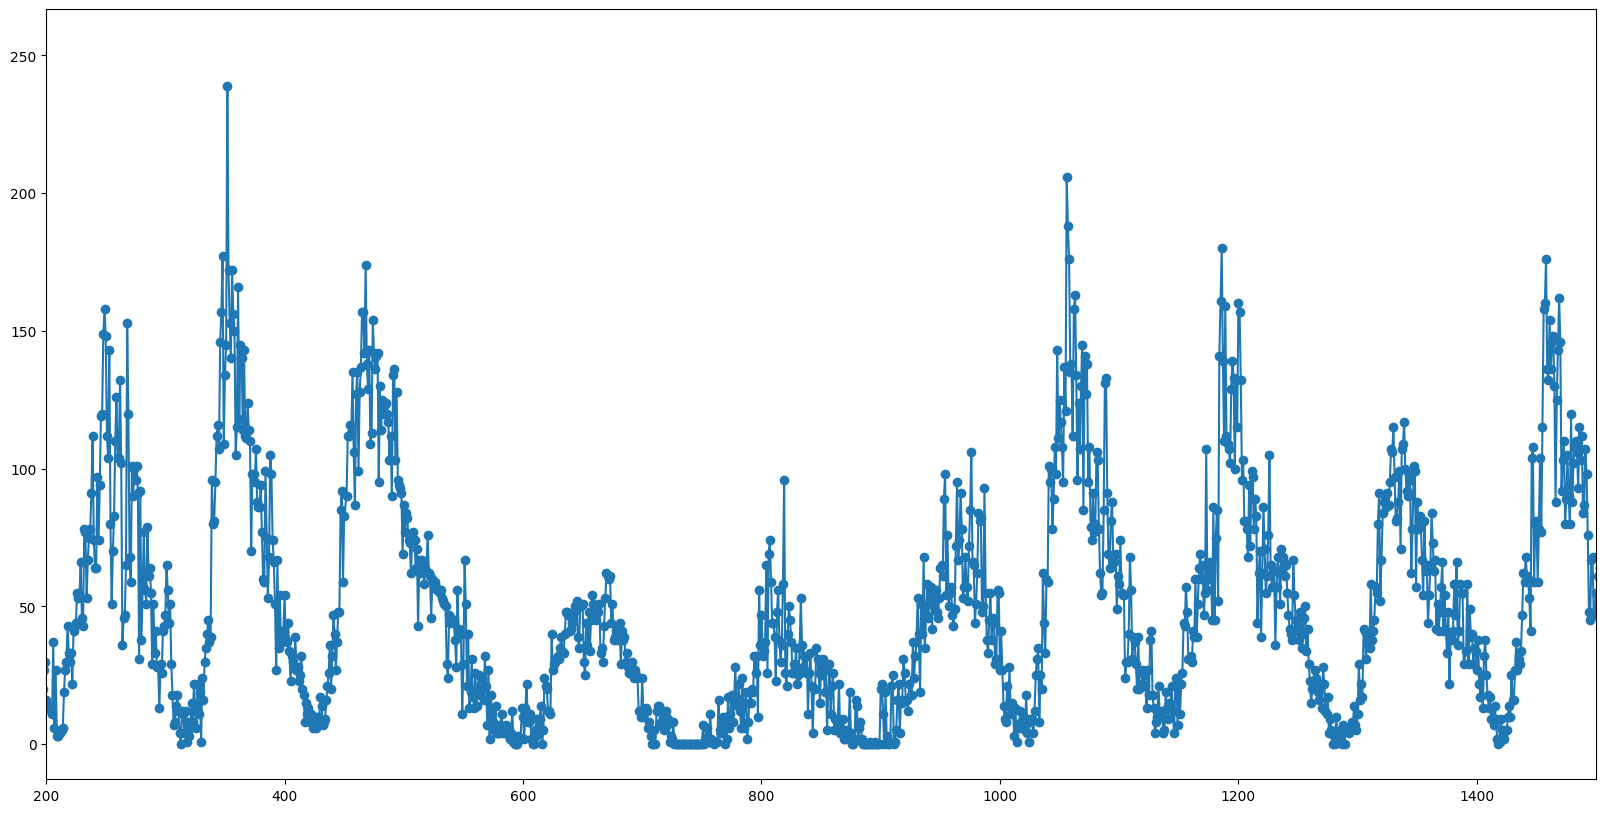

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests

series = np.empty((0,2), dtype='f')

url = 'https://raw.githubusercontent.com/sjackman/bc/master/data/astro/sunspot.txt'
response = requests.get(url)
data = response.text
data = data.split("\n") # then split it into lines

#print(data)
for i,line in enumerate(data):
    if i<3: continue
    words = line.split()
    if len(words) < 6: continue
    #print([[i-3], float(words[-1])])
    series = np.append(series, [[i-3, float(words[-1])]], axis=0)

print(series)
X = series[:,0]
y = series[:,1]

plt.figure(figsize=(20,10))
plt.plot(X,y)
plt.scatter(X,y)
plt.xlim(200,1500)
plt.show()

#### Сглаживание временного ряда методом скользящего среднего

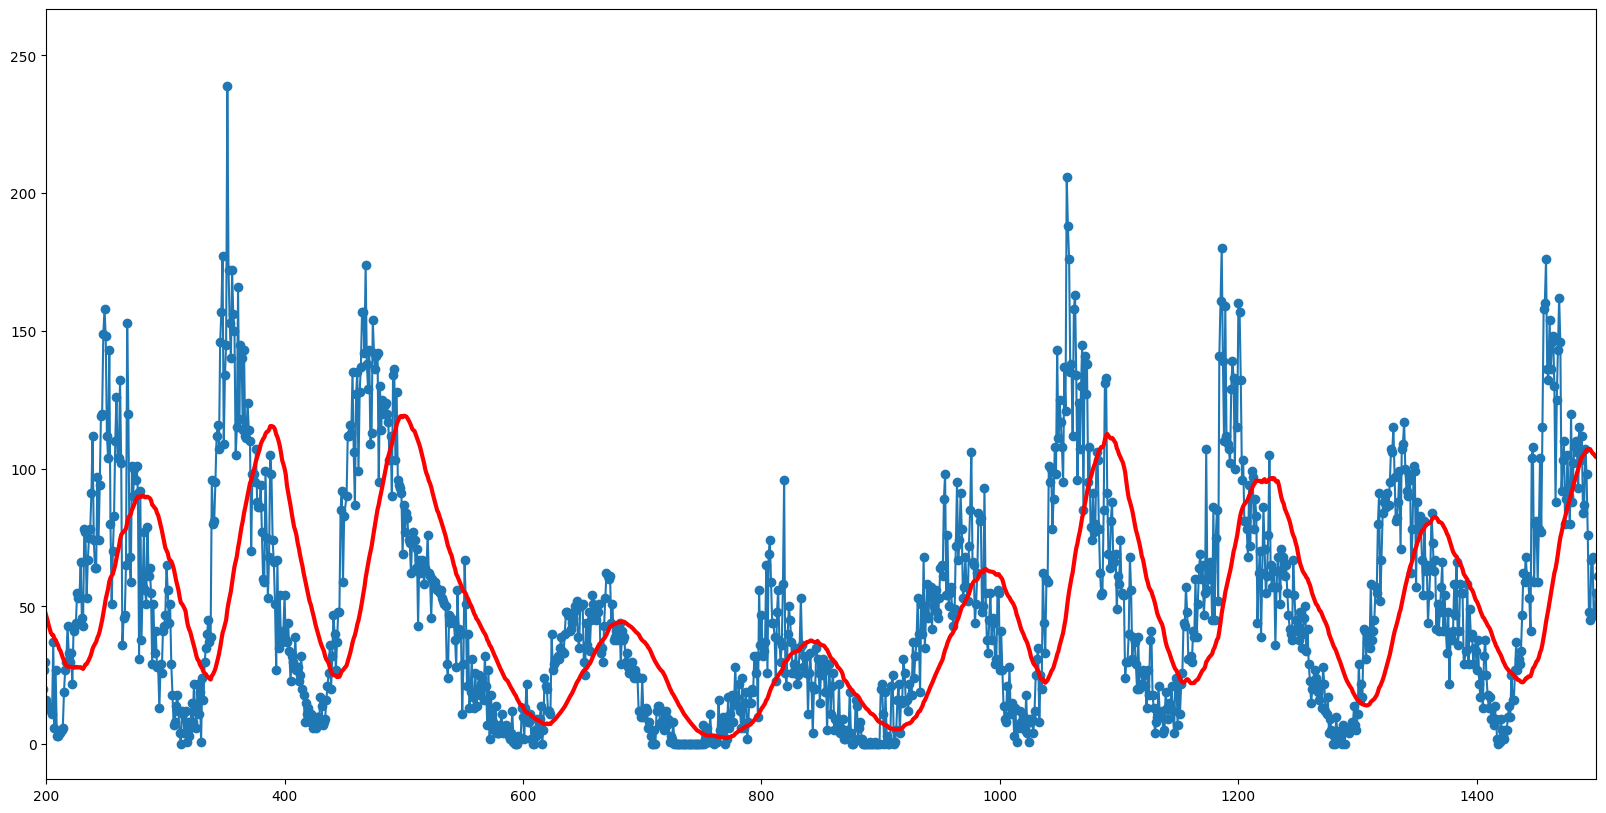

In [ ]:
def moving_average(series, windowsize):
    result = [series[windowsize-1]]
    for t in range(windowsize,len(series)):
        result.append(sum(series[t-n] for n in range(windowsize)) / (windowsize))
    return result

k = 50
y_ma = moving_average(y,k)

plt.figure(figsize=(20,10))
plt.plot(X,y)
plt.scatter(X,y)
plt.plot(X[k-1:], y_ma, c='r', linewidth=3)
plt.xlim(200,1500)
plt.show()

### Работа с геоданными в Python и Jupyter

https://proglib.io/p/rabota-s-geodannymi-v-python-i-jupyter-2021-03-22


In [ ]:
location = [[55.825526, 49.035777], [55.832952, 49.06102], [55.833072, 49.066256], [55.83327, 49.076737], [55.833377, 49.081586], [55.834517, 49.08901], [55.835372, 49.096176], [55.835805, 49.100174], [55.830532, 49.100956], [55.826873, 49.108947]]
print(location)

[[55.825526, 49.035777], [55.832952, 49.06102], [55.833072, 49.066256], [55.83327, 49.076737], [55.833377, 49.081586], [55.834517, 49.08901], [55.835372, 49.096176], [55.835805, 49.100174], [55.830532, 49.100956], [55.826873, 49.108947]]


In [ ]:
!pip install ipyleaflet >> None

In [ ]:
from ipyleaflet import AntPath, WidgetControl
from ipyleaflet import Map, Marker, Popup
from ipywidgets import IntSlider, jslink
from ipywidgets import HTML

m = Map(center=tuple(location[0]), zoom=13)

bus_path = AntPath(
    locations=location,
    dash_array=[1, 10],
    delay=1000,
    color='#9500ff',
    pulse_color='#9500ff'
)

m.add_layer(bus_path)

start_marker = Marker(location=tuple(location[0]))
m.add_layer(start_marker)

finish_marker = Marker(location=tuple(location[-1]))
m.add_layer(finish_marker)

start = HTML()
finish = HTML()
start.value = "Старт"
finish.value = "Финиш!"
start_marker.popup = start
finish_marker.popup = finish

zoom_slider = IntSlider(description='Масштаб:', min=11, max=15, value=13)
jslink((zoom_slider, 'value'), (m, 'zoom'))
widget_control1 = WidgetControl(widget=zoom_slider, position='topright')
m.add_control(widget_control1)

m

Map(center=[55.825526, 49.035777], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

### API сайта openweathermap.org для прогноза погоды

In [ ]:
# подключаем библиотеку для работы с запросами
import requests
# индивидуальный ключ (1000 запросов в сутки)
key = 'e62aada2acf8d68a522350fbb1a48fbc'
# указываем город
city = 'Казань'
# формируем запрос
url = 'https://api.openweathermap.org/data/2.5/weather?q='+city+'&units=metric&lang=ru&appid=' + key
# отправляем запрос на сервер и сразу получаем результат
weather_data = requests.get(url).json()

# получаем данные о температуре и о том, как она ощущается
temperature = round(weather_data['main']['temp'])
temperature_feels = round(weather_data['main']['feels_like'])
# выводим значения на экран
print('Сейчас в городе', city, str(temperature), '°C')
print('Ощущается как', str(temperature_feels), '°C')

Сейчас в городе Казань -5 °C
Ощущается как -7 °C


Программу, которая каждый час делает запрос к API сайта

In [ ]:
import requests
import time

def make_request(url):
    response = requests.get(url)
    return response.json()

for i in range(10):
    url = 'https://api.openweathermap.org/data/2.5/weather?q='+city+'&units=metric&lang=ru&appid=' + key
    weather_data = requests.get(url).json()
    print(weather_data['main']['temp'])
    time.sleep(10)  # ожидание 10 секунд

0.34
0.34
0.34
0.34
0.34
0.34
0.34
0.34


KeyboardInterrupt: 

## 5. Тексты

### Регистрация в разделе инструментов разработчика Telegram

Для работы с API Telegram нам необходимо получить **api_id** и **api_hash**. Сделать это можно в разделе <a href="https://my.telegram.org/apps" target="_blank">инструментов разработчика Telegram</a>.

Переходим по ссылке и авторизуемся, используя номер телефона, привязанный к вашему профилю в мессенджере. После авторизации необходимо выбрать пункт API development tools:


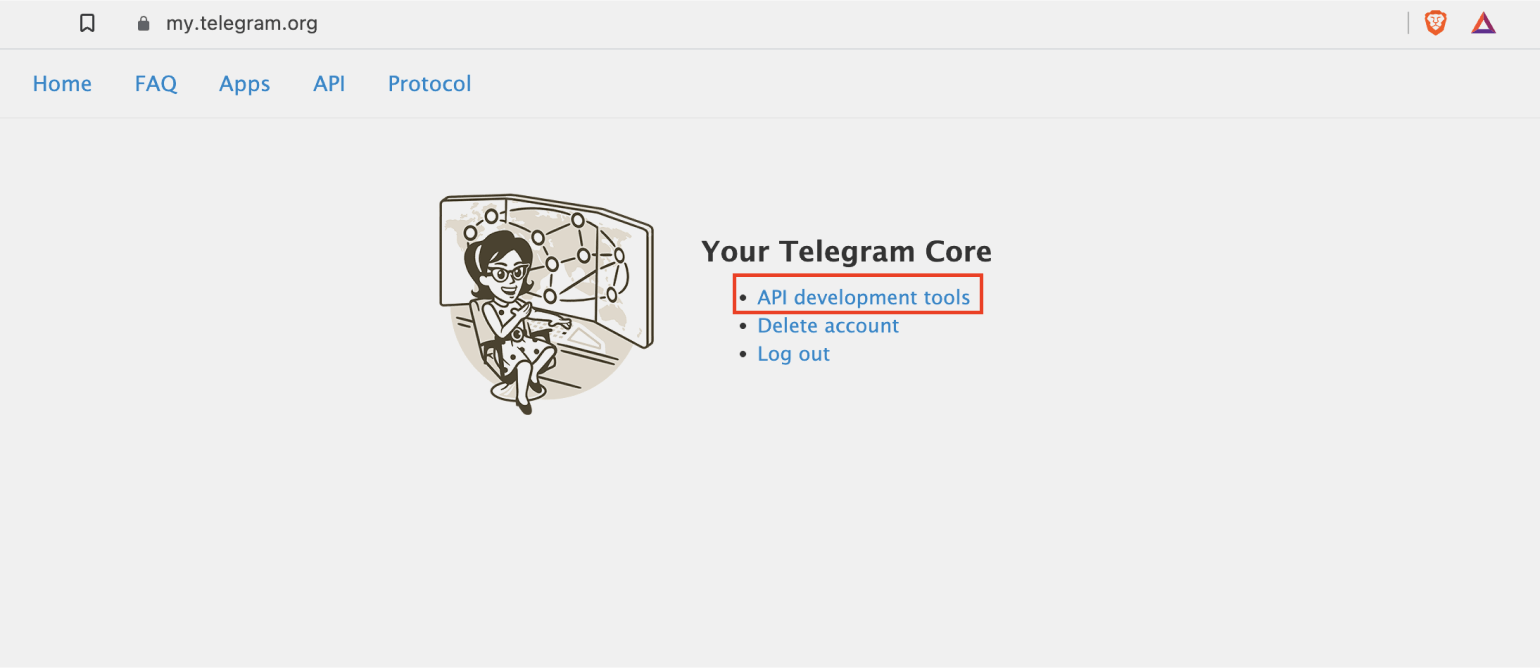

В открывшейся форме заполняем пустые поля. Всё заполнять необязательно, главное — указать полное и краткое имя приложения:

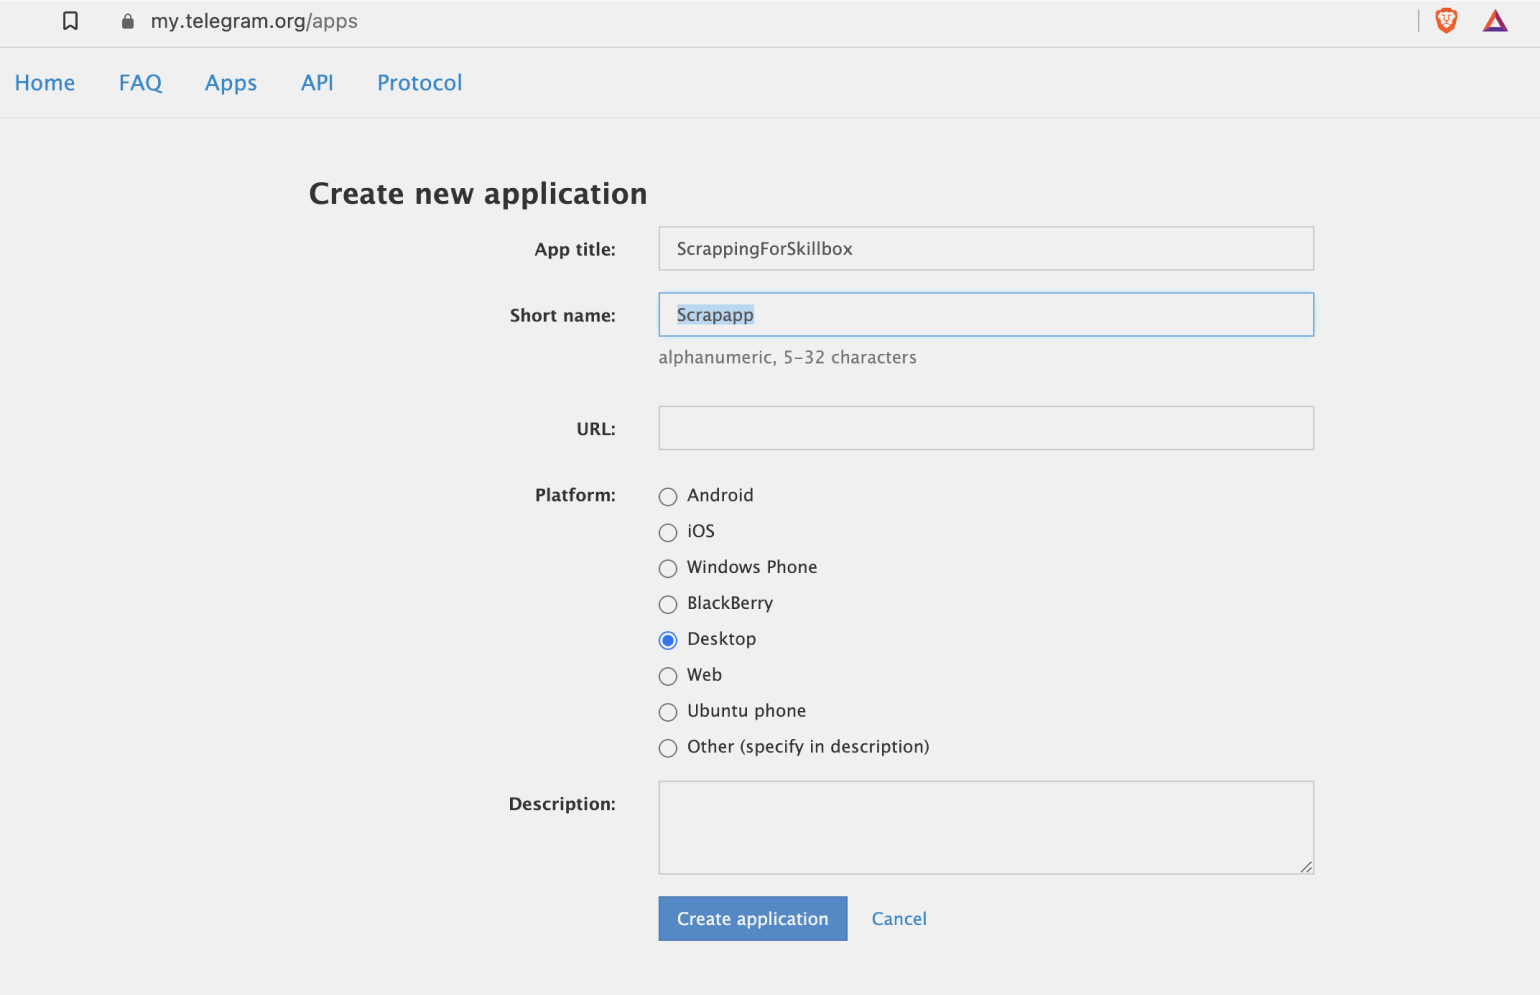

После нажатия Create application откроется страница, на которой нас интересует два параметра:

* **api-id** — 12345678;
* **api-hash** — a6c555ad4fd3e22e1c111f0a12345678.

**Важно!**

**Не отправляйте свои api-id и api-hash третьим лицам. Их могут использовать для работы с мессенджером от вашего имени.**

### Чтение текстовых сообщений из открытого канала

https://docs.pyrogram.org/

In [ ]:
!pip install pyrogram

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 37.5 MB/s eta 0:00:00
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26346 sha256=1cd85beb716321b233cbc9ff133f23d2a19a6dccbc7a2d2a45ece664c831c765
  Stored in directory: /root/.cache/pip/wheels/d6/84/5f/ea6aef85a93c7e1922486369874f4740a5642d261e09c59140
Successfully built pyaes


In [ ]:
api_id = 12345678
api_hash = 'a6c555ad4fd3e22e1c111f0a12345678'

In [ ]:
import re

from pyrogram import Client
import asyncio
import nest_asyncio
nest_asyncio.apply()

async def TelegramBatchLoader(author_url):
  platform = "Telegram"
  post_url = re.sub(r'@', "", author_url)
  app = Client("my_account", api_id, api_hash)
  async with app:
    channel_info = await app.get_chat(author_url)

  author_name = re.sub(r'[|<>:"/\\*]+', ".", channel_info.title)

  print('-----------------------------------')
  async with app:
    #await app.join_chat(author_url)
    post_count = 0
    async for message in app.get_chat_history(author_url, limit=30):
      print(post_count)
      url = message.link

      #print(message)

      post_text = message.text
      if post_text:
        print(message.text)

      if message.caption:
        print(message.caption)

      if message.video_note:
        print(message.video_note)


      post_count += 1
      print('-----------------------------------')

asyncio.run(TelegramBatchLoader('pro_ai_news'))

-----------------------------------
0
Нейросети: Ваш ключ к стабильному и пассивному доходу. Не верите? Убедитесь сами!

Представьте, что вы осваиваете три разных типа нейросетей, выполняете реальные проекты высокого уровня и составляете план получения дохода всего за 5 дней! Звучит невероятно? Это возможно с нашим эксклюзивным марафоном нейросетей!

Вот что вас ждёт:

1. Понимание, что из себя представляют нейросети и как они могут быть вам полезны.
2. Навыки доступа к заблокированным нейросетям!
3. Работа над полноценными проектами с тремя видами нейросетей - текстовыми, графическими и аудио.
4. Знания более 40 способов заработка на нейросетях, включая пассивные.

И это ещё не всё! Зарегистрируйтесь прямо сейчас и получите подарок "Более 40 способов заработка на нейросетях". 

Места ограничены, и они заполняются быстро. Не упустите свой шанс научиться зарабатывать на нейросетях уже сегодня!

Ссылка для регистрации!
-----------------------------------
1
📺 LG создали гибкий дисплей

Ег

# Домашние задания

1) Обработка изображений

Взять произвольное изображение. Поместить в центр рисунка белый квадрат, занимающий 10% площади рисунка.

2) Обработка видео

Взять произвольный видеофайл. Поместить в случайном месте каждого кадра видеопотока белый кварат со стороной 50 px.

3) Обработка аудиофайла

1. Найти в обучающем наборе esc50-dataset WAV файл с лаем собаки;
2. визуально по графику амплитуды звуковой волны найти участок файла непосредственно содержащий звук лая;
3. построить спектрограмму для найденного участка;
4. подумать (и реализовать), как с помощью цифрового представления звука можно автоматизировать удаление части файла, не содержащего полезной информации.

4) Визуализация временного ряда

1. Зарегистрируйтесь на сайте openweathermap.org и получите свой ключ для автоматизации действий;
2. исследуйте структуру json ответа сайта и найти поля с температурой, влажностью и давлением;
3. соберите данные об изменении температуры, влажности и давления по любому городу за 3 дня;
4. автоматизруте запросы к сайту раз в час, сохраняйте данные во внешний файл, чтобы они не потерялись при перезагрузке виртуальной машины google colab;
5. постройте с помощью библиотреки matplotlib на одном рисунке графики изменения всех наблюдаемых характеристик. Оформите красиво подписи осей (с днями и часами измерений), легенду графиков.

5) Сбор текстовых данных

1. Создайте приложения для работы с Telegram;
2. получите api_id и api_hash для автоматизации действий в мессенджере;
3. соберите ровно 1000 (!) непустых текстовых сообщений из любого открытого канала;
4. сохраните сообщения в TXT файл для дальнейшего чтения и работы;
5. посчитайте среднее значение количества слов в одном сообщении канала.

# Дополнительная информация

1. Подборка датасетов для машинного обучения:

https://habr.com/ru/articles/452392/

2. Учить русский жестовый язык стало проще:

https://habr.com/ru/companies/sberbank/news/846240/


#Домашнее задание

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Задание 1

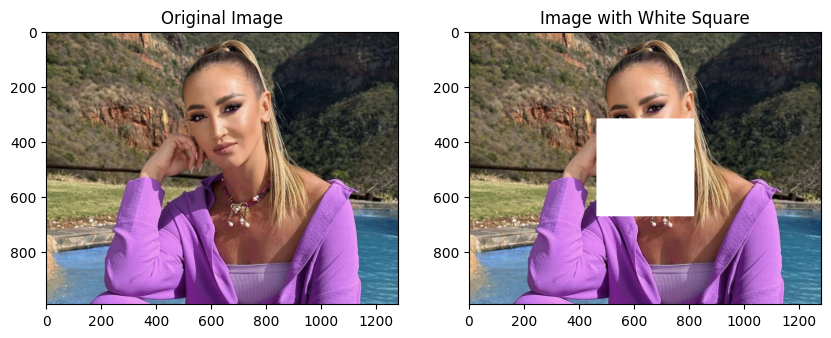

In [ ]:
#Обработка изображений
#Взять произвольное изображение. Поместить в центр рисунка белый квадрат, занимающий 10% площади рисунка.
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

def add_white_square(img, square_percentage=10):
    height, width, _ = img.shape
    square_side = int(np.sqrt(square_percentage / 100 * height * width))
    x_min = (width - square_side) // 2
    y_min = (height - square_side) // 2
    img[y_min:y_min + square_side, x_min:x_min + square_side] = [255, 255, 255]

    return img

orig_img = imread('/content/drive/My Drive/olga_buzova.jpg')
img_with_square = add_white_square(orig_img.copy(), square_percentage=10)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(orig_img)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(img_with_square)
plt.title("Image with White Square")

plt.show()

#Задание 2

In [ ]:
#Обработка видео

#Взять произвольный видеофайл. Поместить в случайном месте каждого кадра видеопотока белый кварат со стороной 50 px.

import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

def display_video(video):
    fig = plt.figure(figsize=(16,8))

    mov = []
    for i in range(len(video)):
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)

    plt.close()
    return anime

import cv2
import numpy as np
import random
import imageio
from IPython.display import HTML

def add_random_white_square(frame, square_size=50):
    height, width, _ = frame.shape
    x_min = random.randint(0, width - square_size)
    y_min = random.randint(0, height - square_size)
    frame[y_min:y_min + square_size, x_min:x_min + square_size] = [255, 255, 255]
    return frame

input_video_path = 'surfer.mp4'
output_video_path = 'output_surfer.mp4'

cap = cv2.VideoCapture(input_video_path)

if not cap.isOpened():
    print("Ошибка при открытии видеофайла!")
    exit()

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_with_square = add_random_white_square(frame, square_size=50)
    out.write(frame_with_square)

cap.release()
out.release()

print(f"Видео успешно сохранено в {output_video_path}")

video = imageio.mimread(output_video_path)
HTML(display_video(video).to_html5_video())

Видео успешно сохранено в output_surfer.mp4


#Задание 3

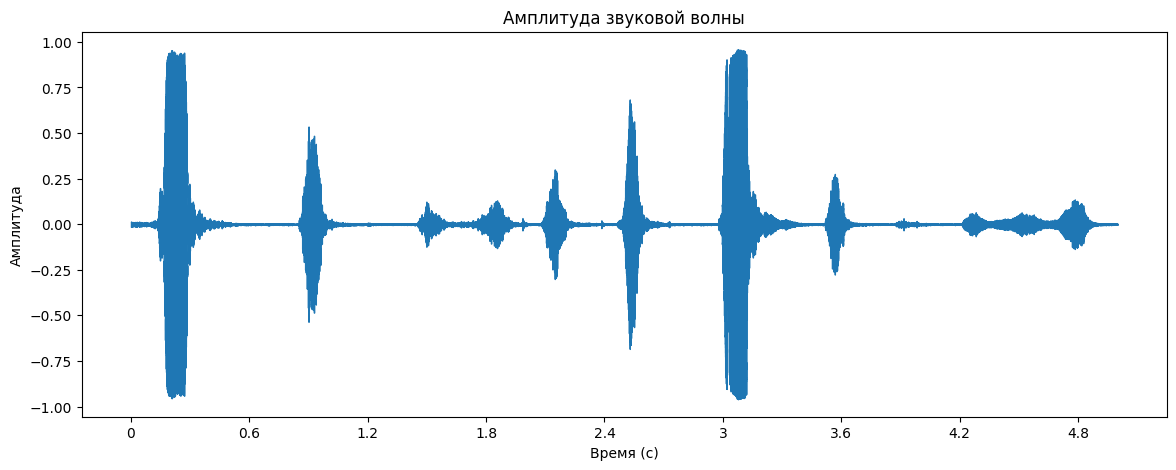

In [ ]:
#Обработка аудиофайла

#Найти в обучающем наборе esc50-dataset WAV файл с лаем собаки;
# https://dagshub.com/kinkusuma/esc50-dataset/src/3b812aa828f357df417069600a096c31816c5ef3/dataset/1-32318-A-0.wav

import numpy as np
import librosa

import matplotlib.pyplot as plt
import librosa.display
import soundfile as sf
import io
from six.moves.urllib.request import urlopen

audio_url = 'https://dagshub.com/kinkusuma/esc50-dataset/raw/3b812aa828f357df417069600a096c31816c5ef3/dataset/1-32318-A-0.wav'
data, sample_rate = sf.read(io.BytesIO(urlopen(audio_url).read()))

#визуально по графику амплитуды звуковой волны найти участок файла непосредственно содержащий звук лая;

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sample_rate)
plt.title("Амплитуда звуковой волны")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.show()

#я взяла файл где собачка много лаяла, поэтому возьму часть с 1.5 по 3.4

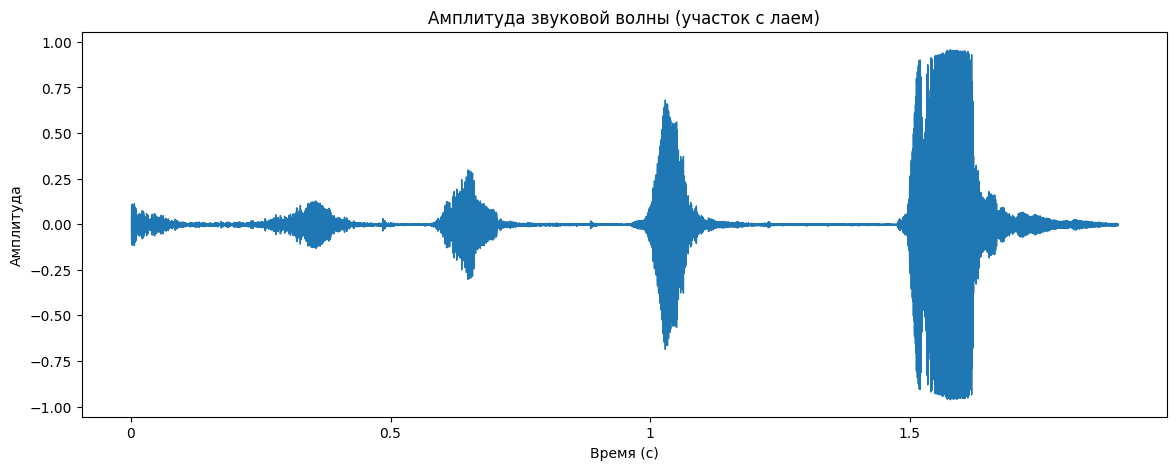

In [ ]:
start_time = 1.5
end_time = 3.4

start_sample = int(start_time * sample_rate)
end_sample = int(end_time * sample_rate)

data_bark = data[start_sample:end_sample]

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data_bark, sr=sample_rate)
plt.title("Амплитуда звуковой волны (участок с лаем)")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.show()

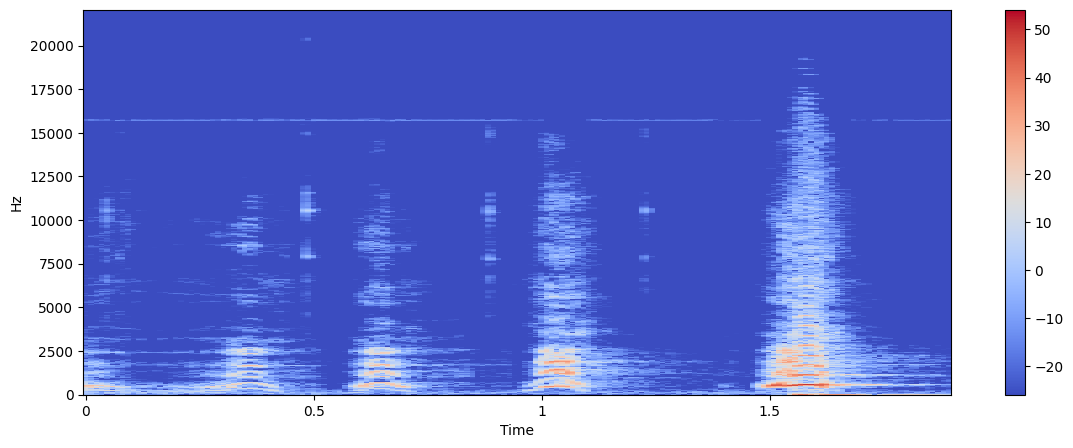

In [ ]:
#построить спектрограмму для найденного участка;
X = librosa.stft(data_bark)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

Длительность очищенного аудиофайла: 1.1282766439909298 секунд


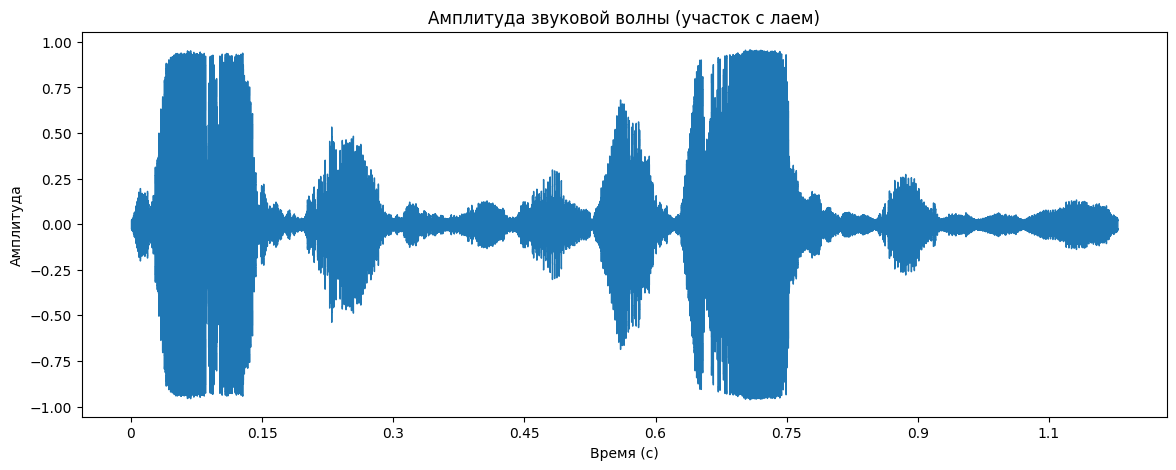

In [ ]:
#подумать (и реализовать), как с помощью цифрового представления звука можно автоматизировать удаление части файла, не содержащего полезной информации.
# Устанавливаем порог амплитуды
threshold = 0.02  # Значение порога можно настроить в зависимости от шума

silent_indices = np.where(np.abs(data) < threshold)[0]

data_filtered = np.delete(data, silent_indices)

sf.write('filtered_bark.wav', data_filtered, sample_rate)

print(f"Длительность очищенного аудиофайла: {librosa.get_duration(y=data_filtered, sr=sample_rate)} секунд")

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data_filtered, sr=sample_rate)
plt.title("Амплитуда звуковой волны (участок с лаем)")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.show()

In [ ]:
from IPython.display import Audio

Audio('filtered_bark.wav')
#Лают и много)

#Задание 4

In [ ]:
#Визуализация временного ряда

#Зарегистрируйтесь на сайте openweathermap.org и получите свой ключ для автоматизации действий;
#исследуйте структуру json ответа сайта и найти поля с температурой, влажностью и давлением;
#соберите данные об изменении температуры, влажности и давления по любому городу за 3 дня;
#автоматизруте запросы к сайту раз в час, сохраняйте данные во внешний файл, чтобы они не потерялись при перезагрузке виртуальной машины google colab;
#постройте с помощью библиотреки matplotlib на одном рисунке графики изменения всех наблюдаемых характеристик. Оформите красиво подписи осей (с днями и часами измерений), легенду графиков.

In [ ]:
#Как я собрала статистику за 3 дня? Сначала очевидно написала скрипт ниже скрипт, который поллит сервер каждый час.
#На своем ПК и в коллабе больше нескольких часов статистики собрать не получилось бы.
#У меня был опыт в использовании хостингов. Многие хостинги предоставляют бесплатный период, особенно для таких простых программ, как эта.
#Я воспользовалась хостингом https://cloud.amvera.ru, который когда-то раздавал по 1000 рублей на пробный период.

import requests
import time
import csv
from datetime import datetime, timedelta

API_KEY = 'b7c143f6b47bb72e7850a61bd9a31fb7'
CITY = 'Moscow'
SAVE_FILE = '/data/weather_data.csv'
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

def get_weather_data():
    params = {"q": CITY, "appid": API_KEY, "units": "metric"}
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Ошибка запроса: {response.status_code}")
        return None

def save_data(data, file_name):
    with open(file_name, mode='a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(data)

def wait_until_next_hour():
    now = datetime.now()
    next_hour = (now + timedelta(hours=1)).replace(minute=0, second=0, microsecond=0)
    print(next_hour)
    sleep_time = (next_hour - now).total_seconds()
    time.sleep(sleep_time)

def collect_weather_data():
    end_time = datetime.now() + timedelta(days=3)
    while datetime.now() < end_time:
        wait_until_next_hour()
        weather_data = get_weather_data()
        if weather_data:
            current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            data_point = [current_time, weather_data["main"]["temp"],weather_data["main"]["humidity"],weather_data["main"]["pressure"]];
            print(data_point)
            save_data(data_point, SAVE_FILE)
            print(f"Сохранено: {data_point}")

#collect_weather_data()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Сохранено: {'datetime': '2024-12-02 18:05:34', 'temperature': -0.12, 'humidity': 61, 'pressure': 1023}


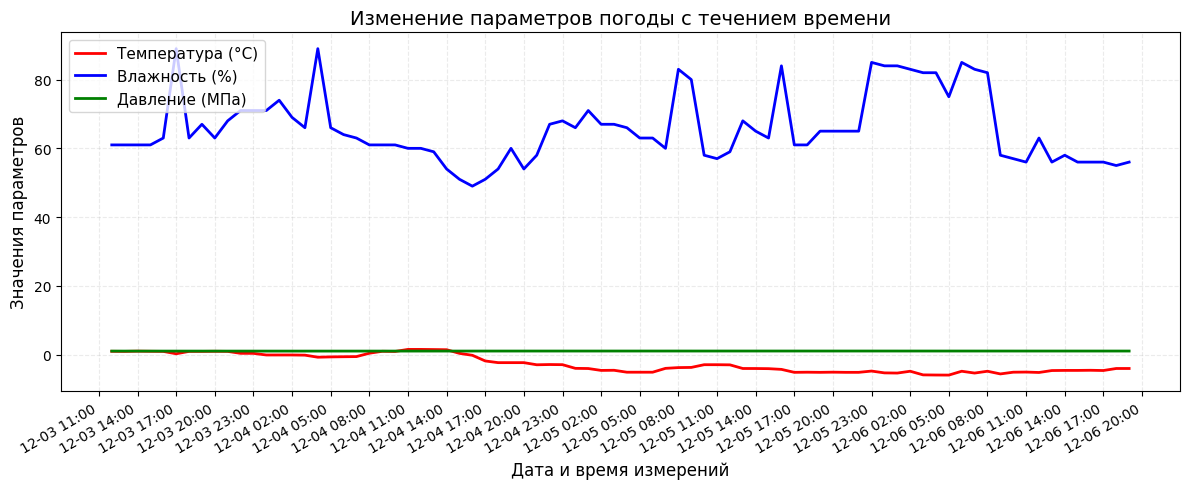

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime


data = pd.read_csv("weather_data.csv", names=["time", "temperature", "humidity", "pressure"])

data["time"] = pd.to_datetime(data["time"], format="%Y-%m-%d %H:%M:%S")

# Преобразуем давление в МПа
data["pressure_mpa"] = data["pressure"] / 1e3

plt.figure(figsize=(12, 5))

plt.plot(data["time"], data["temperature"], label="Температура (°C)", color="red", linewidth=2)

plt.plot(data["time"], data["humidity"], label="Влажность (%)", color="blue", linewidth=2)

plt.plot(data["time"], data["pressure_mpa"], label="Давление (МПа)", color="green", linewidth=2)

plt.title("Изменение параметров погоды с течением времени", fontsize=14)
plt.xlabel("Дата и время измерений", fontsize=12)
plt.ylabel("Значения параметров", fontsize=12)

plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%m-%d %H:%M"))
plt.gcf().autofmt_xdate()
plt.legend(fontsize=11, loc="upper left")

plt.grid(True, linestyle="--", alpha=0.25)

plt.tight_layout()
plt.show()

#Задание 5

In [ ]:
!pip install pyrogram

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 49.0 MB/s eta 0:00:00
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26346 sha256=3f15b194e0c6d9252a5d28f056db4a469e928b341828a2bf551b14fca09f846d
  Stored in directory: /root/.cache/pip/wheels/d6/84/5f/ea6aef85a93c7e1922486369874f4740a5642d261e09c59140
Successfully built pyaes


In [ ]:
#Сбор текстовых данных

#Создайте приложения для работы с Telegram;
#получите api_id и api_hash для автоматизации действий в мессенджере;
#соберите ровно 1000 (!) непустых текстовых сообщений из любого открытого канала;
#сохраните сообщения в TXT файл для дальнейшего чтения и работы;
#посчитайте среднее значение количества слов в одном сообщении канала.

import re
import asyncio
from pyrogram import Client
import nest_asyncio
import os

nest_asyncio.apply()

api_id = 29068637
api_hash = '5214ce57a66a0cfbb2a1feb889da4022'

def count_words(text):
    if text:
        words = text.split()
        return len(words)
    return 0

async def TelegramBatchLoader(author_url, output_file='messages.txt', batch_size=100, total_limit=1000):
    app = Client("my_account", api_id, api_hash)
    word_count = 0
    total_messages = 0
    offset_id = 0
    with open(output_file, 'w', encoding='utf-8') as file:
        async with app:
            channel_info = await app.get_chat(author_url)
            print(f"Загружаем сообщения с канала/чата: {channel_info.title}")

            while total_messages < total_limit:
                async for message in app.get_chat_history(author_url, limit=batch_size, offset_id=offset_id):
                    # Проверяем, есть ли текст или медиа
                    if message.text:
                        post_text = message.text
                        words_in_message = len(post_text.split())
                        word_count += words_in_message
                        total_messages += 1
                        file.write(post_text + "\n")
                        file.write("-" * 50 + "\n")

                    offset_id = message.id

                    if total_messages >= total_limit:
                        print(f"Достигнут лимит в {total_limit} сообщений.")
                        break

                if total_messages < total_limit:
                    print(f"Загружено сообщений: {total_messages}...")

    if total_messages > 0:
        avg_words = word_count / total_messages
        print(f"\nСреднее количество слов в одном сообщении: {avg_words:.2f}")
        print(f"Всего загружено сообщений: {total_messages}")
    else:
        print("Не удалось загрузить сообщения.")

author_url = 'rian_ru'
asyncio.run(TelegramBatchLoader(author_url, output_file='messages.txt'))
#Ниже иллюстрация

Загружаем сообщения с канала/чата: РИА Новости
Загружено сообщений: 70...
Загружено сообщений: 118...
Загружено сообщений: 180...
Загружено сообщений: 241...
Загружено сообщений: 302...
Загружено сообщений: 366...
Загружено сообщений: 427...
Загружено сообщений: 468...
Загружено сообщений: 512...
Загружено сообщений: 587...
Загружено сообщений: 648...
Загружено сообщений: 719...


Загружено сообщений: 774...
Загружено сообщений: 819...
Загружено сообщений: 892...
Загружено сообщений: 951...
Достигнут лимит в 1000 сообщений.

Среднее количество слов в одном сообщении: 31.02
Всего загружено сообщений: 1000


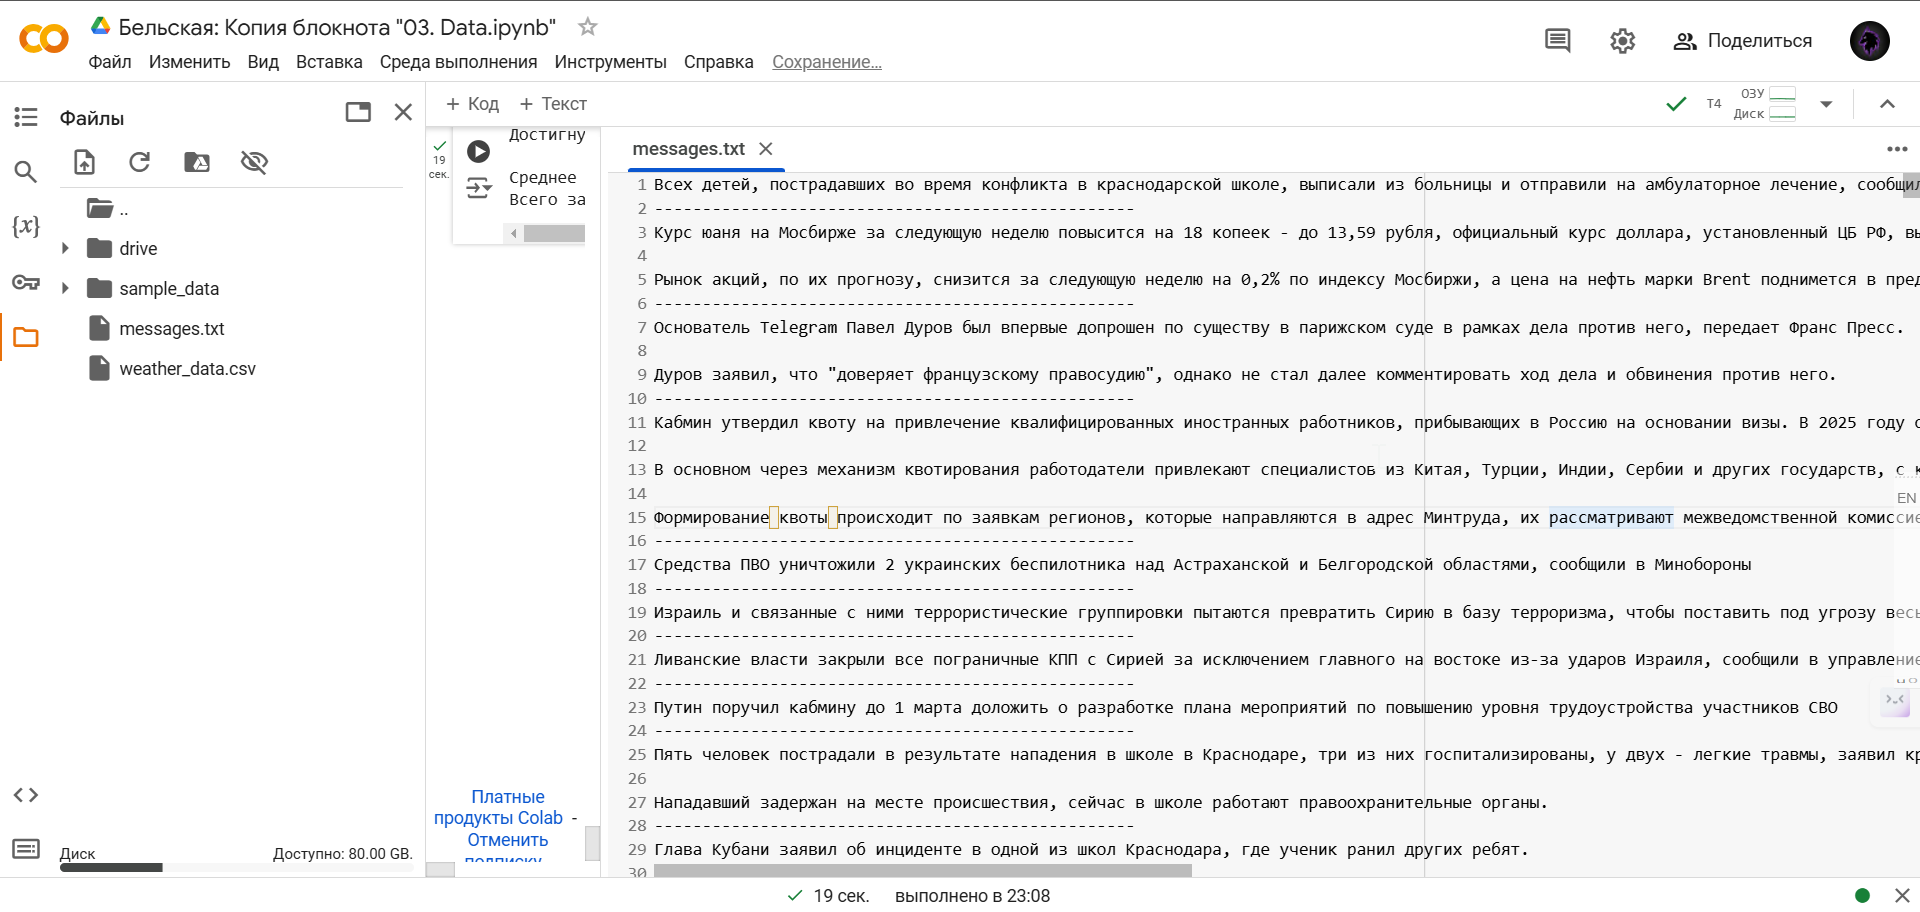